In [141]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [142]:
train_df=pd.read_csv(r"C:\Users\sayan\OneDrive\Desktop\fliprobo projects\Malignant Comments Classifier Project\train.csv")
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [143]:
test_df=pd.read_csv(r"C:\Users\sayan\OneDrive\Desktop\fliprobo projects\Malignant Comments Classifier Project\test.csv")
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [144]:
train_df.drop(['id'],axis=1,inplace=True)
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [145]:
test_df.drop(['id'],axis=1,inplace=True)
test_df

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [146]:
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [147]:
train_df.tail()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [148]:
test_df.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [149]:
test_df.tail()

,comment_text
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."
153163,""" \n :::Stop already. Your bullshit is not wel..."


In [150]:
train_df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [151]:
test_df.isnull().sum()

comment_text    0
dtype: int64

In [152]:
test_df.dtypes

comment_text    object
dtype: object

In [154]:
print('train shape is ',train_df.shape)
print('test shape is ',test_df.shape)
print('test info',test_df.info)
print('train info',train_df.info)

train shape is  (159571, 7)
test shape is  (153164, 1)
test info <bound method DataFrame.info of                                              comment_text
0       Yo bitch Ja Rule is more succesful then you'll...
1       == From RfC == \n\n The title is fine as it is...
2       " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       :If you have a look back at the source, the in...
4               I don't anonymously edit articles at all.
...                                                   ...
153159  . \n i totally agree, this stuff is nothing bu...
153160  == Throw from out field to home plate. == \n\n...
153161  " \n\n == Okinotorishima categories == \n\n I ...
153162  " \n\n == ""One of the founding nations of the...
153163  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 1 columns]>
train info <bound method DataFrame.info of                                              comment_text  malignant  \
0       Explanation\nWhy the edits made under my usern...       

In [156]:
print('train data Set descriptin',train_df.describe())
print('test data Set descriptin',test_df.describe())

train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


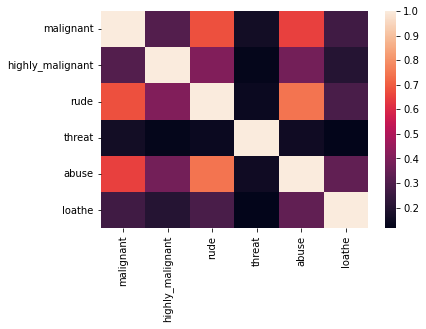

In [157]:
print(train_df.corr())
print(sns.heatmap(train_df.corr()))

In [158]:
# checking the skewness for the features:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


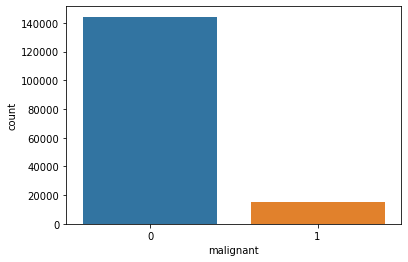

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


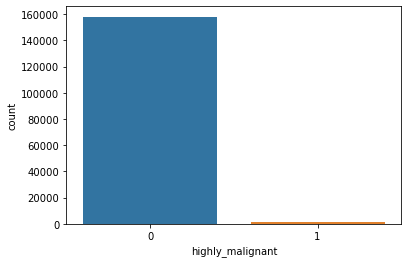

loathe


0    158166
1      1405
Name: loathe, dtype: int64


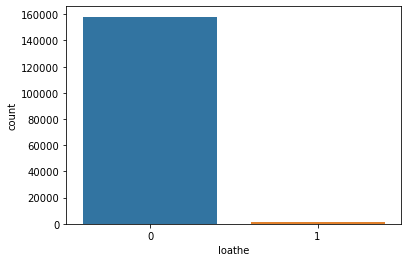

rude


0    151122
1      8449
Name: rude, dtype: int64


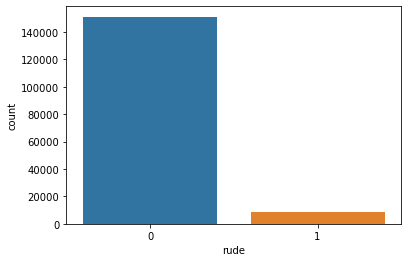

abuse


0    151694
1      7877
Name: abuse, dtype: int64


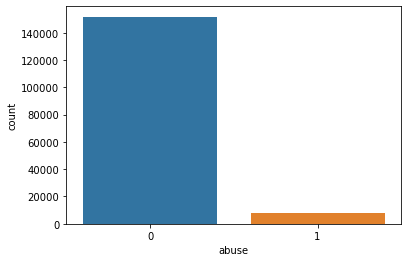

threat


0    159093
1       478
Name: threat, dtype: int64


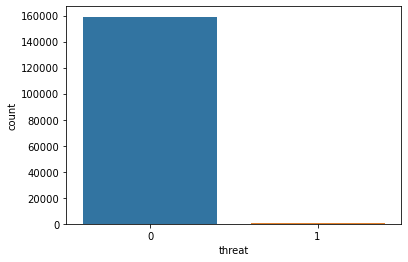

In [161]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

In [163]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [1]:
nltk.download('stopwords')

In [164]:
train_df['length'] = train_df['comment_text'].str.len()
train_df.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [167]:
port_stem=PorterStemmer()

In [168]:
def stemming(comment_text):
    stemmed_comment_text = re.sub('[^a-zA-z]',' ',comment_text)##will remove all the data other than alphabates like (,''@numeric)###
    stemmed_comment_text = stemmed_comment_text.lower() ##converting all letters to lowercase for making machine to understand easily#
    stemmed_comment_text = stemmed_comment_text.split()
    stemmed_comment_text = [port_stem(word) for word in stemmed_comment_text if not word in stopwords.words('english')]
    stemmed_comment_text = ' '.join(stemmed_comment_text)
    return stemmed_comment_text

In [169]:
train_df['comment_text']=train_df['comment_text'].apply(stemming)
print(train_df['comment_text'])

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3         more i can t make any real suggestions on impr...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really don t think you understand i came...
Name: comment_text, Length: 159571, dtype: object


In [171]:
train_df['clean_length'] = train_df.comment_text.str.len()
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264,260
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,112,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233,229
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622,601
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67,63


In [173]:
print ('Origian Length', train_df.length.sum())
print ('Clean Length', train_df.clean_length.sum())

Origian Length 62893130
Clean Length 60538208


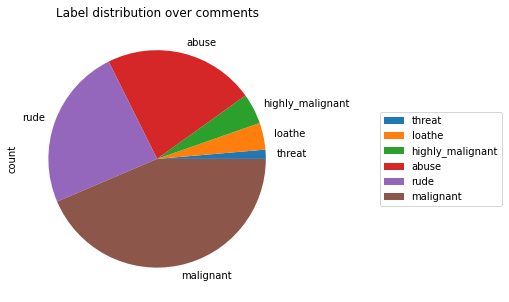

In [176]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train_df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [178]:
target_data = train_df[cols_target]

train_df['bad'] =train_df[cols_target].sum(axis =1)
print(train_df['bad'].value_counts())
train_df['bad'] = train_df['bad'] > 0 
train_df['bad'] = train_df['bad'].astype(int)
print(train_df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train_df['comment_text'])
x = features

In [183]:
print(x)

  (0, 6071)	0.1701592809151943
  (0, 7579)	0.2828642189520915
  (0, 6353)	0.10189036343330142
  (0, 8815)	0.10307803712324369
  (0, 8889)	0.1925231386222581
  (0, 7440)	0.16916079099982945
  (0, 2729)	0.11714533798968471
  (0, 3269)	0.2752638418616382
  (0, 9974)	0.23903769704949113
  (0, 5936)	0.14806886137415376
  (0, 9637)	0.2735844401490765
  (0, 3719)	0.2826888973508324
  (0, 1616)	0.3188260069518397
  (0, 4863)	0.11051654749831745
  (0, 9752)	0.25716200986658905
  (0, 7604)	0.18246021762266276
  (0, 3325)	0.23603652551634374
  (0, 4015)	0.31168118485416063
  (0, 9452)	0.21716453508019662
  (0, 2892)	0.15068547047220904
  (0, 3229)	0.2121683388343689
  (1, 9464)	0.2048443346714867
  (1, 4755)	0.29460875255659796
  (1, 8944)	0.1735854081700596
  (1, 8586)	0.3477403844694542
  :	:
  (159568, 546)	0.13204076628762432
  (159568, 105)	0.2874724357087771
  (159569, 5268)	0.44463157791435837
  (159569, 106)	0.36453917043454237
  (159569, 9550)	0.4265330037313515
  (159569, 5167)	0.250430

In [187]:
y=train_df['bad']
y

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: bad, Length: 159571, dtype: int32

In [184]:
train_df.shape

(159571, 10)

In [185]:
test_df.shape

(153164, 1)

In [197]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=30)

In [199]:
rf=RandomForestClassifier(n_estimators=100,random_state=50)
dt = DecisionTreeClassifier()
model=[rf,dt]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_train)
    print('Training accuracy is {}'.format(accuracy_score(y_train,predm)))
    predm=m.predict(x_test)
    print('accuracy_score of',m ,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Training accuracy is 0.9988988263099938
accuracy_score of RandomForestClassifier(random_state=50) is:
0.9560494652406417
[[42317   598]
 [ 1506  3451]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42915
           1       0.85      0.70      0.77      4957

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872

Training accuracy is 0.998925684204872
accuracy_score of DecisionTreeClassifier() is:
0.9391502339572193
[[41503  1412]
 [ 1501  3456]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42915
           1       0.71      0.70      0.70      4957

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [211]:
print(test_df)

  (0, 8900)	0.08853748869422334
  (0, 7575)	0.10112270687721589
  (0, 8846)	0.11018417609155799
  (0, 1319)	0.16975668731840382
  (0, 3734)	0.16551202500755058
  (0, 1380)	0.16870783819907076
  (0, 9086)	0.23046059268638447
  (0, 5190)	0.07387699141891217
  (0, 9737)	0.11230715476716062
  (0, 7984)	0.11458177587215672
  (0, 2863)	0.13206684145824196
  (0, 5402)	0.12139956384327034
  (0, 5835)	0.14232841382146805
  (0, 2402)	0.15789862407661107
  (0, 6841)	0.19405330296334708
  (0, 4033)	0.1405658850559772
  (0, 826)	0.12369093740824466
  (0, 4979)	0.1824957777030722
  (0, 3373)	0.19863272050590527
  (0, 9594)	0.27137994467681653
  (0, 9272)	0.1576824098371852
  (0, 8117)	0.20170860888908118
  (0, 7703)	0.16216939068005085
  (0, 4123)	0.2011675623242019
  (0, 9586)	0.18507180469446205
  :	:
  (153162, 563)	0.11415765362660668
  (153162, 8976)	0.1568193529222448
  (153162, 5715)	0.11316538172707276
  (153162, 5203)	0.09962307616562628
  (153162, 5881)	0.13172035155304831
  (153162, 4763)

In [212]:
import joblib

In [213]:
joblib.dump(rf,'mallignant comment_detection.obj')

['mallignant comment_detection.obj']

In [214]:
rf_from_joblib=joblib.load('mallignant comment_detection.obj')

In [216]:
test_df_pred=rf_from_joblib.predict(test_df)